In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings  # The warnings module to handle warnings during code execution

# Suppress warnings
warnings.filterwarnings('ignore')

In [22]:
# Load the dataset
data = pd.read_csv("../Data/data_after_EDA2.csv")
data.head()

,index,ROWNUM,Hospital,Eligibility Class,Gender,Arrival Time,Severity Level,Deparment,Main Diagnosis,Discharge Time,Waiting Time (Minutes),Length of Stay (Minutes),Treatment Time(Minutes),Cluster,No Treatment
0,0,1,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-12-13 13:17:48,Level Ⅳ,Emergency Medicine,"Pain, unspecified",2023-12-13 16:43:00,14.0,205.0,191.0,2,0
1,1,2,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-12-08 10:59:28,Level Ⅲ,Emergency Medicine,Low back pain,2023-12-08 12:50:00,7.0,111.0,104.0,1,0
2,2,3,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-11-05 14:03:02,Level Ⅲ,Emergency Medicine,"Acute upper respiratory infection, unspecified",2023-11-05 14:54:00,24.0,51.0,27.0,1,0
3,3,4,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-10-07 22:57:41,Level Ⅲ,Emergency Medicine,Epistaxis,2023-10-08 00:09:00,26.0,71.0,0.0,1,1
4,4,5,Royal Commission Health Services Program,ROYAL COMMISSION,Female,2023-10-21 21:32:17,Level Ⅳ,Emergency Medicine,"Acute upper respiratory infection, unspecified",2023-10-21 23:10:00,56.0,98.0,42.0,0,0


In [23]:
# Load the dataset
nlp_data = pd.read_csv('../Data/updated_dataset.csv')

# Combine the data with the NLP data


features=['Eligibility Class','Gender','Arrival Time','Severity Level','Main Diagnosis']

# Drop the 'Main Diagnosis' column
data = data[features]

data = pd.concat([data, nlp_data], axis=1)

# Convert Arrival Time and Discharge Time to datetime
data['Arrival Time'] = pd.to_datetime(data['Arrival Time'])


# Convert the 'Severity Level' column to numerical
level_mapping = {
    'Level Ⅰ': 1,
    'Level Ⅱ': 2,
    'Level Ⅲ': 3,
    'Level Ⅳ': 4,
    'Level Ⅴ': 5,
    'Unrated': 0
}

data = data[data['Severity Level'] != 'Unrated']

data['Severity Level'] = data['Severity Level'].replace(level_mapping)
data['Severity Level'] = data['Severity Level'].astype(int)

In [24]:
data.nunique()

Eligibility Class        4
Gender                   2
Arrival Time         93177
Severity Level           5
Main Diagnosis        1779
                     ...  
vaginal                  2
vomit                    2
wheeze                   2
wound                    2
wrist                    2
Length: 116, dtype: int64

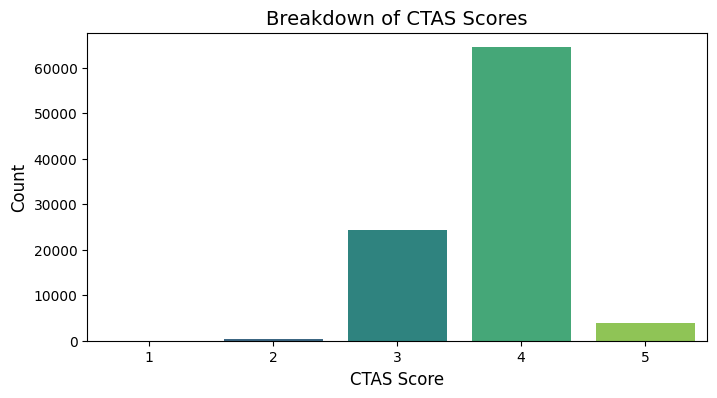

In [25]:
# Create a count plot using seaborn
plt.figure(figsize=(8, 4))
sns.countplot(x='Severity Level', data=data, palette='viridis')

# Set the labels and title
plt.xlabel('CTAS Score', size=12)
plt.ylabel('Count', size=12)
plt.title('Breakdown of CTAS Scores', size=14)
plt.show()

  Eligibility Class  Gender        Arrival Time  Severity Level  \
0  ROYAL COMMISSION  Female 2023-12-13 13:17:48               4   
1  ROYAL COMMISSION  Female 2023-12-08 10:59:28               3   
2  ROYAL COMMISSION  Female 2023-11-05 14:03:02               3   
3  ROYAL COMMISSION  Female 2023-10-07 22:57:41               3   
4  ROYAL COMMISSION  Female 2023-10-21 21:32:17               4   

                                   Main Diagnosis  \
0                               Pain, unspecified   
1                                   Low back pain   
2  Acute upper respiratory infection, unspecified   
3                                       Epistaxis   
4  Acute upper respiratory infection, unspecified   

                Main Diagnosis  abdominal  abnormal  abrasion  abscess  ...  \
0             pain unspecified          0         0         0        0  ...   
1                    back pain          0         0         0        0  ...   
2  upper respiratory infection          0

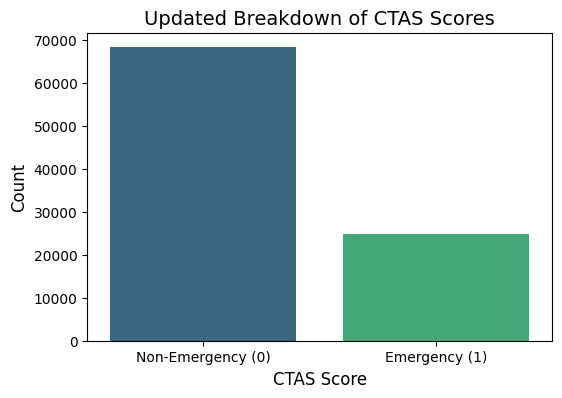

In [26]:
# Grouping the KTAS classes into emergency (1) and non-emergency (0)
data["Emergency"] = np.where(data["Severity Level"] < 4, 1, 0)
print(data.head())

# Count the values in Emergency
CTAS_counts = data['Emergency'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=CTAS_counts.index, y=CTAS_counts.values, palette='viridis')

# Set the labels and title
plt.xlabel('CTAS Score', size=12)
plt.ylabel('Count', size=12)
plt.title('Updated Breakdown of CTAS Scores', size=14)

# Show the plot
plt.xticks(ticks=[0, 1], labels=['Non-Emergency (0)', 'Emergency (1)'])  # Customize x-ticks if necessary
plt.show()

In [27]:
data.head()

,Eligibility Class,Gender,Arrival Time,Severity Level,Main Diagnosis,Main Diagnosis,abdominal,abnormal,abrasion,abscess,...,traumatic,upper,urinary,uterine,vaginal,vomit,wheeze,wound,wrist,Emergency
0,ROYAL COMMISSION,Female,2023-12-13 13:17:48,4,"Pain, unspecified",pain unspecified,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ROYAL COMMISSION,Female,2023-12-08 10:59:28,3,Low back pain,back pain,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ROYAL COMMISSION,Female,2023-11-05 14:03:02,3,"Acute upper respiratory infection, unspecified",upper respiratory infection,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,ROYAL COMMISSION,Female,2023-10-07 22:57:41,3,Epistaxis,epistaxis,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,ROYAL COMMISSION,Female,2023-10-21 21:32:17,4,"Acute upper respiratory infection, unspecified",upper respiratory infection,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [43]:
# Combine the data with the NLP data
# Generate list of NLP feature and time feature columns
feature_columns = nlp_data.columns[1:].tolist()
feature_columns += [
    
    'Eligibility Class', 
    'Gender', 
]



In [44]:

X=data[feature_columns]
y=data['Severity Level']

In [37]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler




# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Perform undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Create a new DataFrame with resampled data
resampled_df = pd.DataFrame(X_resampled)
resampled_df['class'] = y_resampled

# Display the original and resampled class distribution
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(resampled_df['class'].value_counts())

Original class distribution:
Severity Level
4    64497
3    24354
5     3861
2      451
1       26
Name: count, dtype: int64

Resampled class distribution:
class
1    26
2    26
3    26
4    26
5    26
Name: count, dtype: int64


In [12]:
resampled_df

,abdominal,abnormal,abrasion,abscess,accident,acute,allergy,anaemia,ankle,arthropathy,...,urinary,uterine,vaginal,vomit,wheeze,wound,wrist,Eligibility Class,Gender,class
29164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,EXEMPT,Male,0
21810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,INSURANCE,Female,0
92605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,INSURANCE,Male,0
27739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,EXEMPT,Female,0
79975,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,EXEMPT,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,INSURANCE,Female,1
93176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,INSURANCE,Male,1
93181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,INSURANCE,Male,1
93182,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,EXEMPT,Male,1


In [45]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for column in ['Eligibility Class', 'Gender']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


X=data[feature_columns]
y=data['Severity Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.dtypes)

abdominal            int64
abnormal             int64
abrasion             int64
abscess              int64
accident             int64
                     ...  
wheeze               int64
wound                int64
wrist                int64
Eligibility Class    int64
Gender               int64
Length: 112, dtype: object


In [46]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train
results = {}
for name, clf in classifiers.items():
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'report': report, 'confusion_matrix': confusion}

Model: Logistic Regression
Accuracy: 0.7777122008799228
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86     13726
           1       0.70      0.27      0.39      4912

    accuracy                           0.78     18638
   macro avg       0.75      0.61      0.63     18638
weighted avg       0.76      0.78      0.74     18638



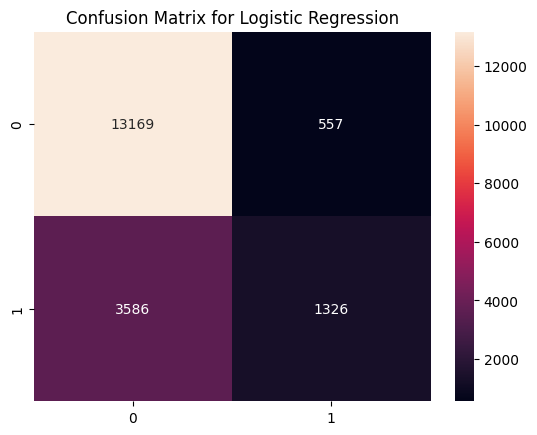

Model: Random Forest
Accuracy: 0.7802875845047752
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     13726
           1       0.67      0.33      0.44      4912

    accuracy                           0.78     18638
   macro avg       0.73      0.64      0.65     18638
weighted avg       0.76      0.78      0.75     18638



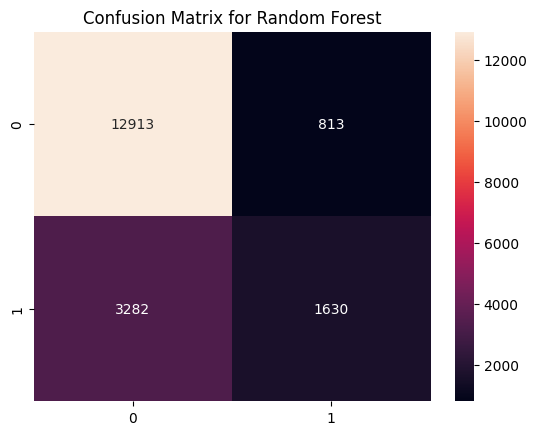

Model: SVM
Accuracy: 0.7784097006116536
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86     13726
           1       0.70      0.28      0.40      4912

    accuracy                           0.78     18638
   macro avg       0.74      0.62      0.63     18638
weighted avg       0.76      0.78      0.74     18638



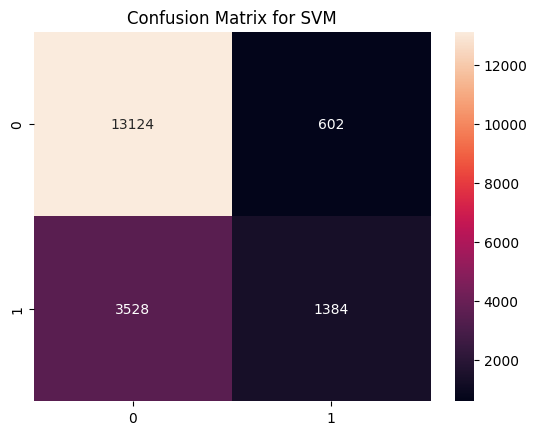

Model: KNN
Accuracy: 0.7551775941624638
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     13726
           1       0.55      0.39      0.46      4912

    accuracy                           0.76     18638
   macro avg       0.68      0.64      0.65     18638
weighted avg       0.74      0.76      0.74     18638



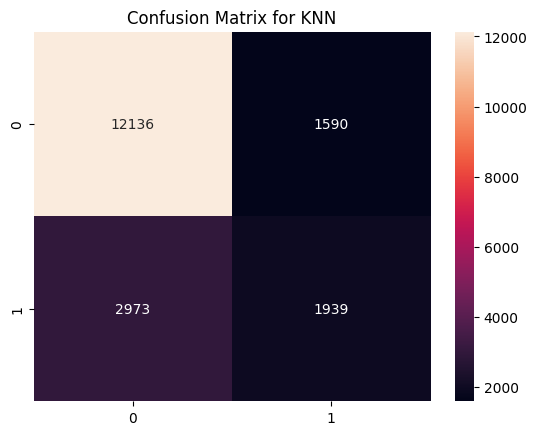

Model: Naive Bayes
Accuracy: 0.746217405300998
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     13726
           1       0.52      0.49      0.50      4912

    accuracy                           0.75     18638
   macro avg       0.67      0.66      0.67     18638
weighted avg       0.74      0.75      0.74     18638



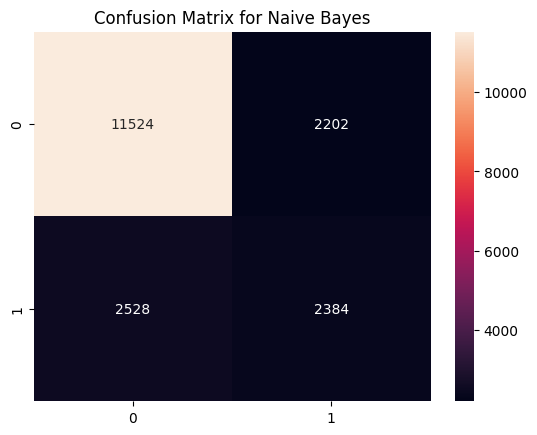

In [32]:
# Evaluate each classifier
for name, result in results.items():
    print(f"Model: {name}")
    print("Accuracy:", result['accuracy'])
    print("Classification Report:")
    print(result['report'])
    sns.heatmap(result['confusion_matrix'], annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=200)

# Initialize RFE with the Logistic Regression model and specify the number of features you want to select
rfe = RFE(estimator=model, n_features_to_select=10)  # Change '10' to the number of features you want

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Get the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the Logistic Regression model on selected features
model.fit(X_train_rfe, y_train)

# Make predictions and evaluate
y_pred_rfe = model.predict(X_test_rfe)
print("Accuracy with RFE:", accuracy_score(y_test, y_pred_rfe))


Accuracy with RFE: 0.7699860500053654


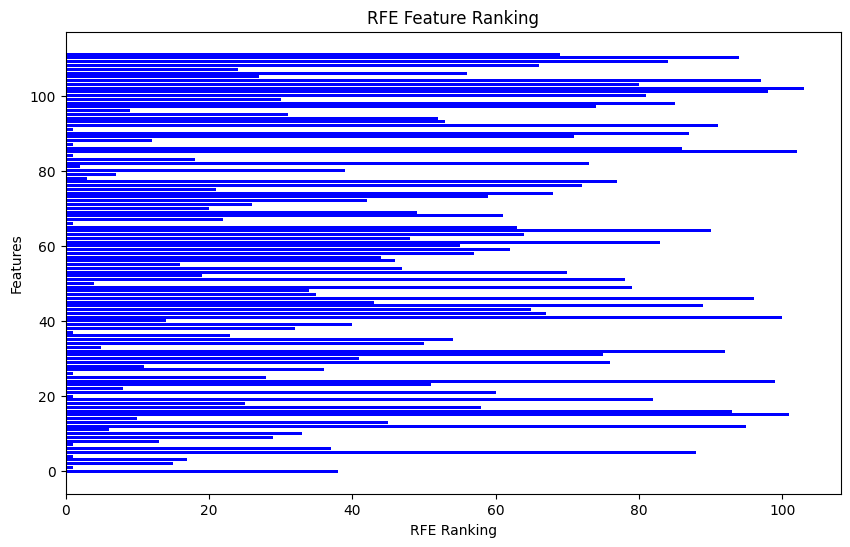

In [34]:
# Get RFE ranking of features
rfe_ranking = rfe.ranking_

# Plot feature ranking (smaller is better, 1 means selected)
plt.figure(figsize=(10, 6))
plt.barh(range(len(rfe_ranking)), rfe_ranking, color='blue')
plt.xlabel('RFE Ranking')
plt.ylabel('Features')
plt.title('RFE Feature Ranking')
plt.show()

Accuracy: 0.7699860500053654
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86     13726
           1       0.78      0.18      0.29      4912

    accuracy                           0.77     18638
   macro avg       0.77      0.58      0.58     18638
weighted avg       0.77      0.77      0.71     18638



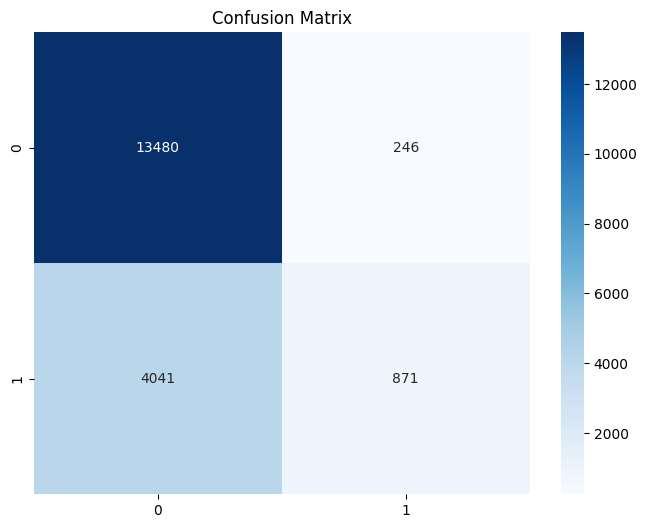

In [35]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_rfe)
report = classification_report(y_test, y_pred_rfe)
confusion = confusion_matrix(y_test, y_pred_rfe)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Apply the same RFE transformation on the validation set
X_val_rfe = rfe.transform(X_val)  # Transform validation features using RFE

# Predict on validation data using the trained model
y_val_pred = model.predict(X_val_rfe)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Generate confusion matrix and classification report for validation set
val_confusion = confusion_matrix(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

# Print classification report
print("Validation Classification Report:\n", val_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(val_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.show()


NameError: name 'X_val' is not defined

In [15]:
''' this result is reasonable but can likely be improved by fine-tuning the model or addressing class imbalance for certain severity levels.'''

# Train the model on the training set
model.fit(X_train_rfe, y_train)

# Calculate accuracy on the training set
training_accuracy = model.score(X_train_rfe, y_train)

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_val, model.predict(X_val_rfe))

# Print the accuracies
print(f"Training Accuracy: {training_accuracy}")
print(f"Validation Accuracy: {validation_accuracy}")


NameError: name 'y_val' is not defined

In [16]:
#print those extreme wrong-classfied values

# 找到被错误分类为 0 的样本，真实标签是 4 或 5
wrongly_classified_as_0 = validation_data[(y_val_pred == 0) & ((y_val == 4) | (y_val == 5))]
print("True 4/5, classified as 0：")
print(wrongly_classified_as_0)

# 找到被错误分类为 4 或 5 的样本，真实标签是 0
wrongly_classified_as_4_or_5 = validation_data[(y_val_pred == 4) | (y_val_pred == 5) & (y_val == 0)]
print("True 0, classified as 4/5：")
print(wrongly_classified_as_4_or_5)


NameError: name 'validation_data' is not defined

In [17]:
# The reason of that is the imbalance of the dataset, we can use SMOTE to balance the dataset


Accuracy: 0.5776907393497156


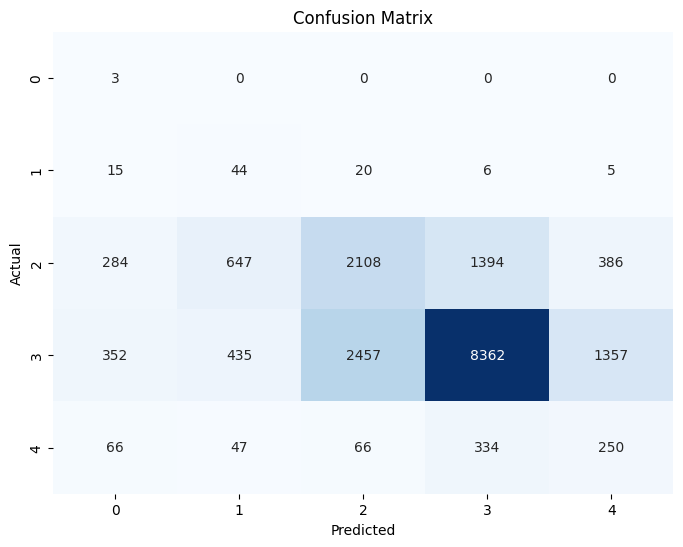

Classification Report:
              precision    recall  f1-score   support

           1       0.00      1.00      0.01         3
           2       0.04      0.49      0.07        90
           3       0.45      0.44      0.45      4819
           4       0.83      0.65      0.73     12963
           5       0.13      0.33      0.18       763

    accuracy                           0.58     18638
   macro avg       0.29      0.58      0.29     18638
weighted avg       0.70      0.58      0.63     18638



In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into features and target


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# Train Logistic Regression with increased max_iter
model = LogisticRegression(max_iter=500)
model.fit(X_train_sm, y_train_sm)

# Evaluate on test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output accuracy
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Model: Logistic Regression
Accuracy: 0.736398755231248
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        90
           3       0.66      0.29      0.40      4819
           4       0.75      0.95      0.84     12963
           5       0.59      0.03      0.06       763

    accuracy                           0.74     18638
   macro avg       0.40      0.25      0.26     18638
weighted avg       0.71      0.74      0.69     18638



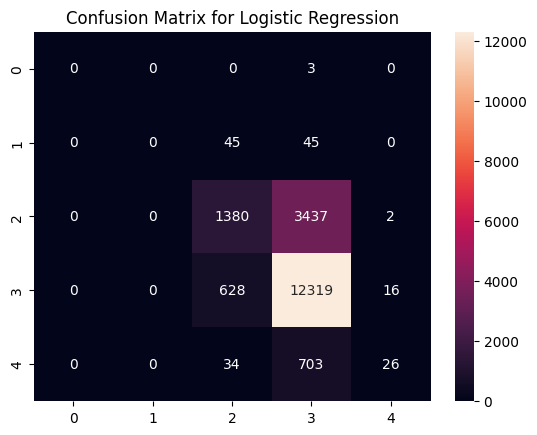

Model: Random Forest
Accuracy: 0.7389204850305827
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        90
           3       0.63      0.34      0.44      4819
           4       0.76      0.93      0.84     12963
           5       0.48      0.04      0.07       763

    accuracy                           0.74     18638
   macro avg       0.37      0.26      0.27     18638
weighted avg       0.71      0.74      0.70     18638



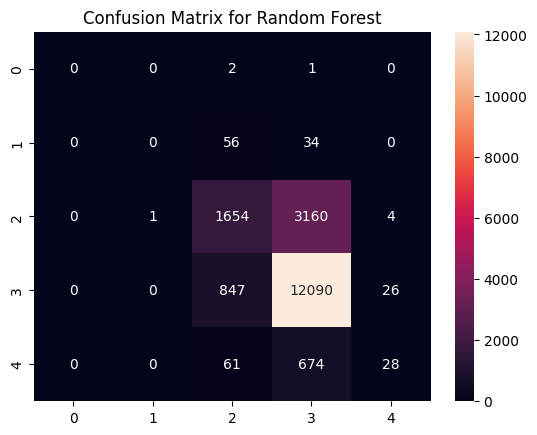

Model: SVM
Accuracy: 0.7363451014057302
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        90
           3       0.66      0.29      0.40      4819
           4       0.75      0.95      0.84     12963
           5       0.59      0.03      0.06       763

    accuracy                           0.74     18638
   macro avg       0.40      0.25      0.26     18638
weighted avg       0.71      0.74      0.69     18638



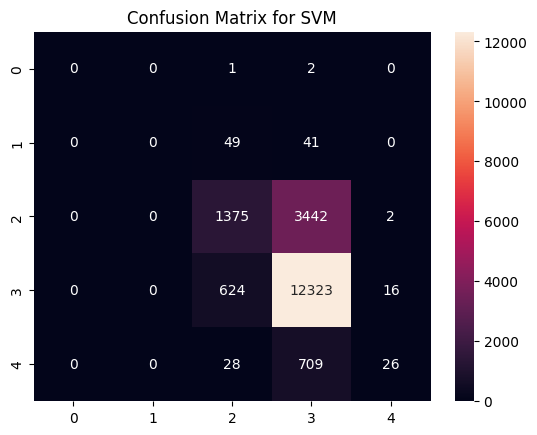

Model: KNN
Accuracy: 0.7118789569696319
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.07      0.01      0.02        90
           3       0.52      0.42      0.46      4819
           4       0.76      0.87      0.81     12963
           5       0.61      0.04      0.07       763

    accuracy                           0.71     18638
   macro avg       0.39      0.27      0.27     18638
weighted avg       0.69      0.71      0.69     18638



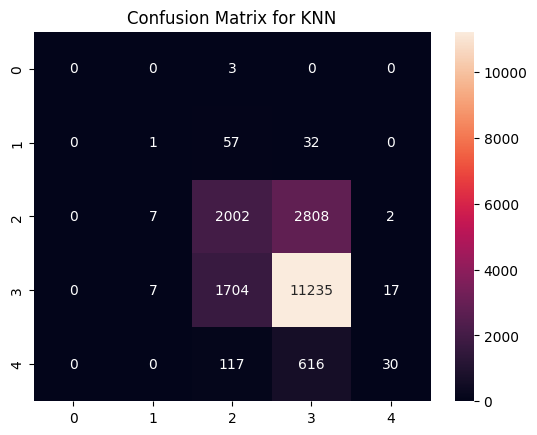

Model: Naive Bayes
Accuracy: 0.12774975855778517
Classification Report:
              precision    recall  f1-score   support

           1       0.00      1.00      0.00         3
           2       0.00      0.33      0.01        90
           3       0.71      0.07      0.12      4819
           4       0.80      0.14      0.24     12963
           5       0.05      0.23      0.09       763

    accuracy                           0.13     18638
   macro avg       0.31      0.35      0.09     18638
weighted avg       0.74      0.13      0.20     18638



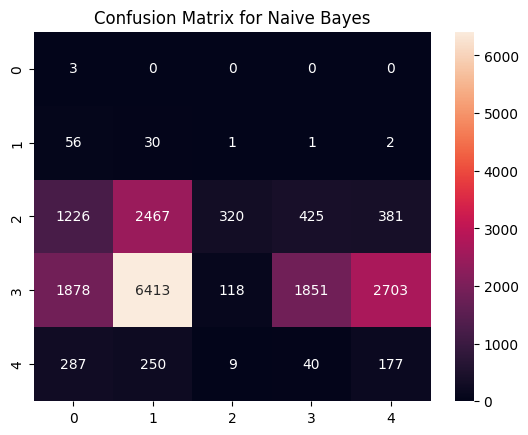

In [47]:
# Evaluate each classifier
for name, result in results.items():
    print(f"Model: {name}")
    print("Accuracy:", result['accuracy'])
    print("Classification Report:")
    print(result['report'])
    sns.heatmap(result['confusion_matrix'], annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Combine the data with the NLP data
combined_data = matched_weather
# Generate list of NLP feature and time feature columns
feature_columns = nlp_data.columns[1:].tolist()
feature_columns += [
    'Eligibility Class',
    'Arrival Hour', 
    'Currently Admitted Patients', 
    'temp', 
    'humidity', 
    'precip', 
    'windspeed', 
    'uvindex', 
    'visibility',
    'Gender',
    'Is Weekend',
    'Time of Day'
    
]
# Fill missing values with 0 before scaling
combined_data[feature_columns] = combined_data[feature_columns].fillna(0)


from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for column in ['Eligibility Class', 'Gender','Time of Day']:
    le = LabelEncoder()
    combined_data[column] = le.fit_transform(combined_data[column])
    label_encoders[column] = le


X=combined_data[feature_columns]
y=combined_data['Severity Level']

# Scale features to [0, 1] - important for neural network models
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(combined_data[feature_columns])

target = 'Emergency'

# Prepare the features DataFrame
X = scaled_features
y = matched_weather[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Target variable


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Store results
results = {}

# Train and evaluate each model
for model_name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)

        # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    results[model_name] = {'accuracy': accuracy, 'report': report, 'confusion_matrix': confusion}
    import matplotlib.pyplot as plt

    print (confusion)
    # Evaluate the model
    

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)